# Applying Common Theme to a Plot Group

You can add a **common theme** to an antire group of plots (i.e. `gggrid()`) to have \
each subplot in the group inherited this theme.

Howether, a **theme** added to an individual subplot will override settings in the **common theme**.

In [1]:
import numpy as np
from lets_plot import *


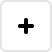
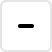
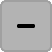
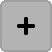
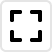
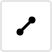
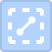
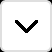
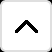
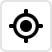
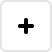
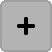
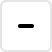
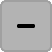
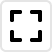
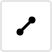
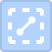
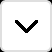
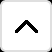
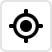

In [2]:
LetsPlot.setup_html()

In [3]:
# Line
x = np.linspace(-4 * np.pi, 4 * np.pi, 100)
line_data = {
    'x': x, 
    'y': np.sin(x)
} 
line = ggplot(line_data, aes(x='x', y='y')) + geom_line() + ggtitle("Line")

# Bars
np.random.seed(37)
bar_data = {'x': np.random.randint(10, size=100)}
bar = ggplot(bar_data, aes(x='x')) + geom_bar() + ggtitle("Barchart")
      
# Boxplot
box_data = {
    'x': np.random.choice(['a', 'b', 'c'], size=100), 
    'y': np.random.normal(size=100)
}
box = ggplot(box_data, aes(x='x', y='y')) + geom_boxplot() + ggtitle("Boxplot")

# Pie
pie_data = {
  'name' : ['rock', 'paper', 'scissors'],
  'slice': [1, 3, 3]
}
pie = ggplot(pie_data) + geom_pie(aes(fill='name', slice='slice'),
                             stat='identity',
                             size=0.5, size_unit="x"
                        )

# Grid
grid = gggrid(
    [line, bar, box, pie],
    ncol=2
) + ggsize(700, 400)

#### 1. A Group without Custom Theme Settings

In [4]:
grid

#### 2. Use Common Theme to Remove All Titles in Subplots

In [5]:
no_titles = theme(axis_title="blank", plot_title="blank")
grid + no_titles

#### 3. Add "Common Flawor" to All Subplots

In [6]:
grid + no_titles + flavor_solarized_dark()


#### 4. Customize the Pie Chart Theme Individually

In [7]:
pie_theme = theme_void() + flavor_solarized_dark()
ggg = gggrid([line, bar, box, 
        pie + pie_theme],
        ncol=2
) + ggsize(700, 400) + no_titles + flavor_solarized_dark() +\
    theme(plot_background=element_rect(color="orange", size=10))  # ToDo: gggrid border is not visible due to zero plot margins.
ggg